In [159]:
import numpy as np
import pandas as pd

In [160]:
df = pd.read_csv('spam.csv', encoding='latin-1')  # Try 'latin-1' first


In [263]:
# Step 1: Combine 'target' and 'text' into a new column 'v3'
df['v3'] = df['target'].astype(str) + ' ' + df['text'].astype(str)

# Step 2: Create a new column 'Unnamed: 5' (if it's not there already)
# Let's just duplicate 'text' for demonstration — you can customize this
df['Unnamed: 5'] = df['text']


In [266]:
df.sample(8)

,target,text,num_characters,num_words,num_sentences,transformed_text,v3,Unnamed: 5
3934,0,You need to get up. Now.,24,8,2,need get,0 You need to get up. Now.,You need to get up. Now.
3447,0,Its &lt;#&gt; k here oh. Should i send home f...,54,19,2,lt gt k oh send home sale,0 Its &lt;#&gt; k here oh. Should i send home...,Its &lt;#&gt; k here oh. Should i send home f...
4401,0,Good FRIENDS CaRE for each Other.. CLoSE Frien...,138,26,2,good friend care close friend understand true ...,0 Good FRIENDS CaRE for each Other.. CLoSE Fri...,Good FRIENDS CaRE for each Other.. CLoSE Frien...
4885,0,Or just do that 6times,22,5,1,6time,0 Or just do that 6times,Or just do that 6times
1965,0,Thanks. It was only from tescos but quite nice...,73,17,4,thank tesco quit nice gone speak soon,0 Thanks. It was only from tescos but quite ni...,Thanks. It was only from tescos but quite nice...
5078,0,Mark works tomorrow. He gets out at 5. His wor...,93,23,3,mark work tomorrow get work hous meet u afterward,0 Mark works tomorrow. He gets out at 5. His w...,Mark works tomorrow. He gets out at 5. His wor...
3323,0,I don wake since. I checked that stuff and saw...,126,29,3,wake sinc check stuff saw true avail space pl ...,0 I don wake since. I checked that stuff and s...,I don wake since. I checked that stuff and saw...
4129,0,And by when you're done I mean now,34,9,1,done mean,0 And by when you're done I mean now,And by when you're done I mean now


In [267]:
df.shape

(5169, 8)

In [163]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvment
# 7. Website
# 8. Deploy

1 Data Cleaning


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   target            5169 non-null   int64 
 1   text              5169 non-null   object
 2   num_characters    5169 non-null   int64 
 3   num_words         5169 non-null   int64 
 4   num_sentences     5169 non-null   int64 
 5   transformed_text  5169 non-null   object
 6   v3                5169 non-null   object
 7   Unnamed: 5        5169 non-null   object
dtypes: int64(4), object(4)
memory usage: 492.5+ KB


In [270]:
# drop last 3 cols
# Check if the columns exist before dropping
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
existing_columns = df.columns

for column in columns_to_drop:
    if column in existing_columns:
        df.drop(columns=[column], inplace=True)
    else:
        print(f"Column '{column}' not found in DataFrame. Skipping.")

Column 'Unnamed: 2' not found in DataFrame. Skipping.
Column 'Unnamed: 3' not found in DataFrame. Skipping.
Column 'Unnamed: 4' not found in DataFrame. Skipping.


In [271]:
df.sample(8)

,target,text,num_characters,num_words,num_sentences,transformed_text,v3,Unnamed: 5
5437,0,Am slow in using biola's fne,28,7,1,slow use biola fne,0 Am slow in using biola's fne,Am slow in using biola's fne
3446,0,Sitting ard nothing to do lor. U leh busy w work?,49,13,2,sit ard noth lor u leh busi w work,0 Sitting ard nothing to do lor. U leh busy w ...,Sitting ard nothing to do lor. U leh busy w work?
1932,0,Jus finished avatar nigro,25,4,1,ju finish avatar nigro,0 Jus finished avatar nigro,Jus finished avatar nigro
5109,0,Oh you got many responsibilities.,33,6,1,oh got mani respons,0 Oh you got many responsibilities.,Oh you got many responsibilities.
1817,0,Well i will watch shrek in 3D!!B),33,11,2,well watch shrek 3d b,0 Well i will watch shrek in 3D!!B),Well i will watch shrek in 3D!!B)
4113,0,Where are you ? What do you do ? How can you s...,154,40,6,stand away heart ach without wonder crave,0 Where are you ? What do you do ? How can you...,Where are you ? What do you do ? How can you s...
3537,0,We are pleased to inform that your application...,139,23,2,pleas inform applic airtel broadband process s...,0 We are pleased to inform that your applicati...,We are pleased to inform that your application...
3860,1,Free Msg: Ringtone!From: http://tms. widelive....,109,20,3,free msg rington http wml 37819,1 Free Msg: Ringtone!From: http://tms. wideliv...,Free Msg: Ringtone!From: http://tms. widelive....


In [273]:
# remaining the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(8)

,target,text,num_characters,num_words,num_sentences,transformed_text,v3,Unnamed: 5
4112,0,Thought we could go out for dinner. I'll treat...,60,16,3,thought could go dinner treat seem ok,0 Thought we could go out for dinner. I'll tre...,Thought we could go out for dinner. I'll treat...
607,0,what I meant to say is cant wait to see u agai...,87,18,1,meant say cant wait see u get bore bridgwat ba...,0 what I meant to say is cant wait to see u ag...,what I meant to say is cant wait to see u agai...
621,0,Good words.... But words may leave u in dismay...,58,13,2,good word word may leav u dismay mani time,0 Good words.... But words may leave u in dism...,Good words.... But words may leave u in dismay...
1275,0,Wot u up 2 u weirdo?,20,7,1,wot u 2 u weirdo,0 Wot u up 2 u weirdo?,Wot u up 2 u weirdo?
4153,0,Haf u eaten? Wat time u wan me 2 come?,38,12,2,haf u eaten wat time u wan 2 come,0 Haf u eaten? Wat time u wan me 2 come?,Haf u eaten? Wat time u wan me 2 come?
247,0,Kallis wont bat in 2nd innings.,31,7,1,kalli wont bat 2nd inning,0 Kallis wont bat in 2nd innings.,Kallis wont bat in 2nd innings.
877,1,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...,137,30,3,sunshin quiz wkli q win top soni dvd player u ...,1 Sunshine Quiz Wkly Q! Win a top Sony DVD pla...,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
2227,0,Oh k.k..where did you take test?,32,9,1,oh take test,0 Oh k.k..where did you take test?,Oh k.k..where did you take test?


In [274]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [275]:
df['target'] = encoder.fit_transform(df['target'])


In [276]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text,v3,Unnamed: 5
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,"0 Go until jurong point, crazy.. Available onl...","Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,0 Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,1 Free entry in 2 a wkly comp to win FA Cup fi...,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,0 U dun say so early hor... U c already then s...,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,"0 Nah I don't think he goes to usf, he lives a...","Nah I don't think he goes to usf, he lives aro..."


In [277]:
# missing values
df.isnull().sum()

,0
target,0
text,0
num_characters,0
num_words,0
num_sentences,0
transformed_text,0
v3,0
Unnamed: 5,0


In [278]:
# check for duplicate values
df.duplicated().sum()

np.int64(0)

In [279]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [280]:
df.duplicated().sum()

np.int64(0)

In [281]:
df.shape

(5169, 8)

2 EDA

In [176]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [282]:
df['target'].value_counts()

,count
target,
0,4516
1,653


In [283]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


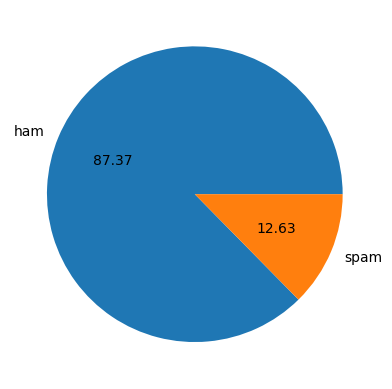

In [178]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts() , labels=['ham','spam'],autopct="%0.2f")
plt.show()


In [284]:
import seaborn as sns
import matplotlib.pyplot as plt

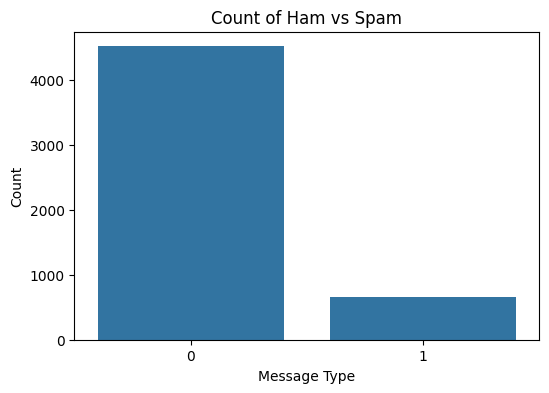

In [285]:
# Count Plot
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Count of Ham vs Spam')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

<ipython-input-290-461385850f53>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Message Type')


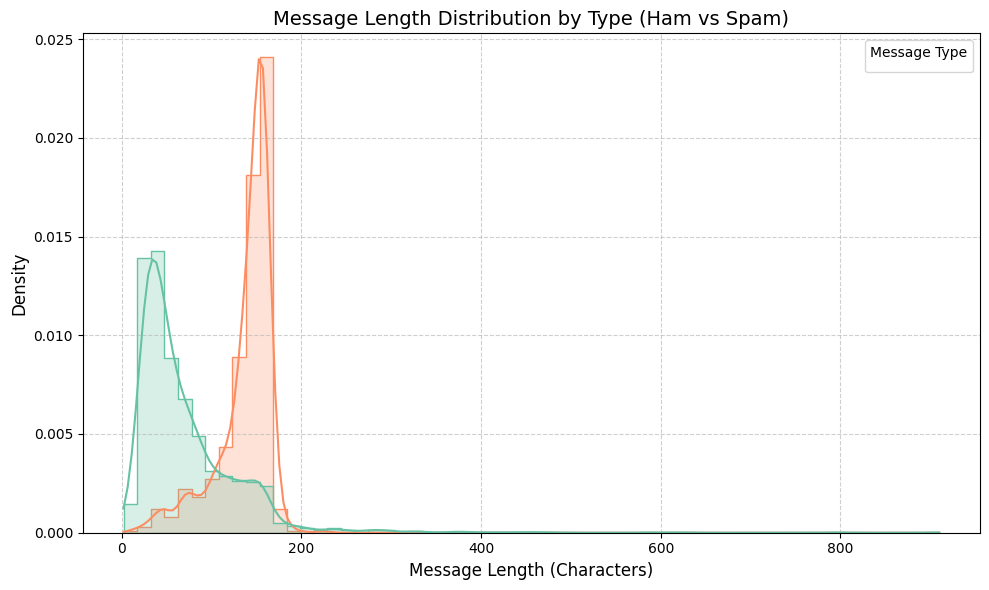

In [290]:
# Ensure 'message_length' exists
df['message_length'] = df['text'].astype(str).apply(len)  # Changed 'v2' to 'text'

# Advanced Histogram (with KDE and hue by target)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='message_length', bins=60, kde=True, hue='target', palette='Set2', element='step', stat='density', common_norm=False)  # Changed 'v1' to 'target' for hue
plt.title('Message Length Distribution by Type (Ham vs Spam)', fontsize=14)
plt.xlabel('Message Length (Characters)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Message Type')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [179]:
# Data is imbalanced

In [291]:
import nltk

In [292]:
!pip install nltk

In [182]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [293]:
df['num_characters'] = df['text'].apply(len)

In [294]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text,v3,Unnamed: 5,message_length
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,"0 Go until jurong point, crazy.. Available onl...","Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,0 Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,1 Free entry in 2 a wkly comp to win FA Cup fi...,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,0 U dun say so early hor... U c already then s...,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,"0 Nah I don't think he goes to usf, he lives a...","Nah I don't think he goes to usf, he lives aro...",61


In [295]:
import nltk

nltk.download('punkt_tab')  # Download the punkt_tab resource

# Now you can proceed with the tokenization:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [296]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text,v3,Unnamed: 5,message_length
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,"0 Go until jurong point, crazy.. Available onl...","Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,0 Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,1 Free entry in 2 a wkly comp to win FA Cup fi...,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,0 U dun say so early hor... U c already then s...,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,"0 Nah I don't think he goes to usf, he lives a...","Nah I don't think he goes to usf, he lives aro...",61


In [297]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [298]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text,v3,Unnamed: 5,message_length
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,"0 Go until jurong point, crazy.. Available onl...","Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,0 Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,1 Free entry in 2 a wkly comp to win FA Cup fi...,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,0 U dun say so early hor... U c already then s...,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,"0 Nah I don't think he goes to usf, he lives a...","Nah I don't think he goes to usf, he lives aro...",61


In [299]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [300]:
 #ham
 df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [301]:
#spam
df[df['target'] == 1 ][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [302]:
import seaborn as sns

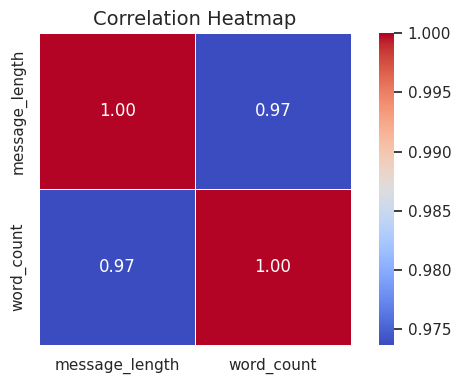

In [312]:
# Keep only numeric features for the heatmap
numeric_df = df[['message_length', 'word_count']]

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", square=True)
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

<Axes: xlabel='num_characters', ylabel='Count'>

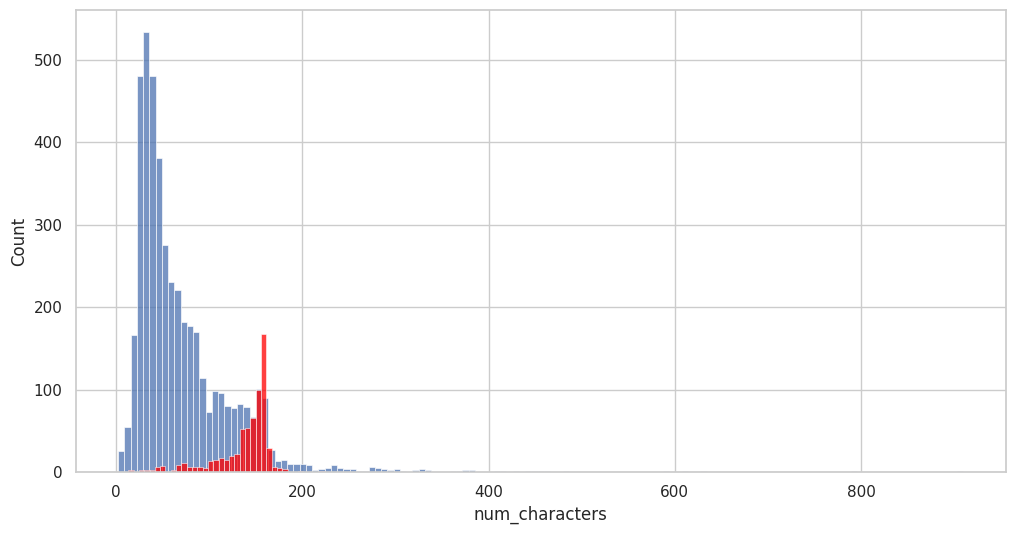

In [313]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

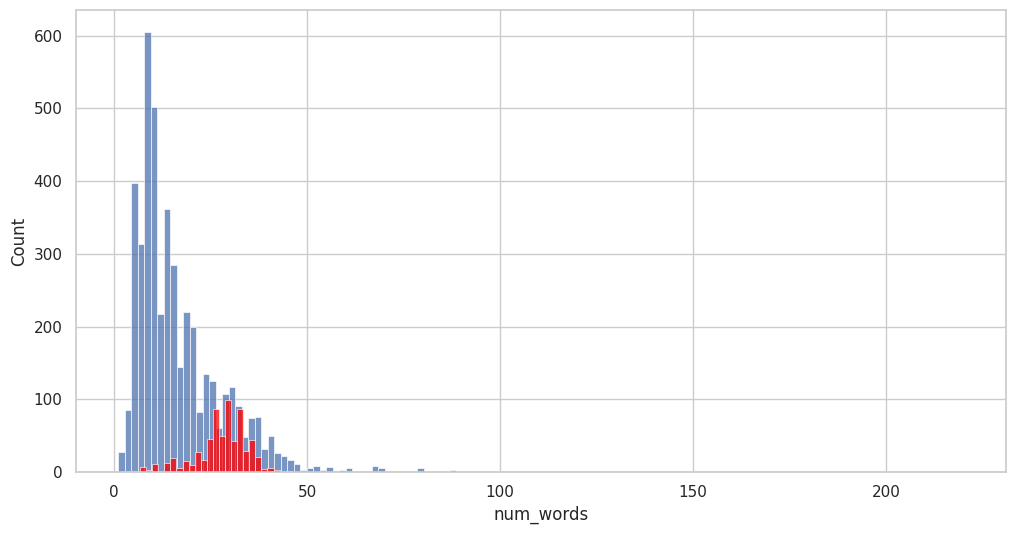

In [314]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

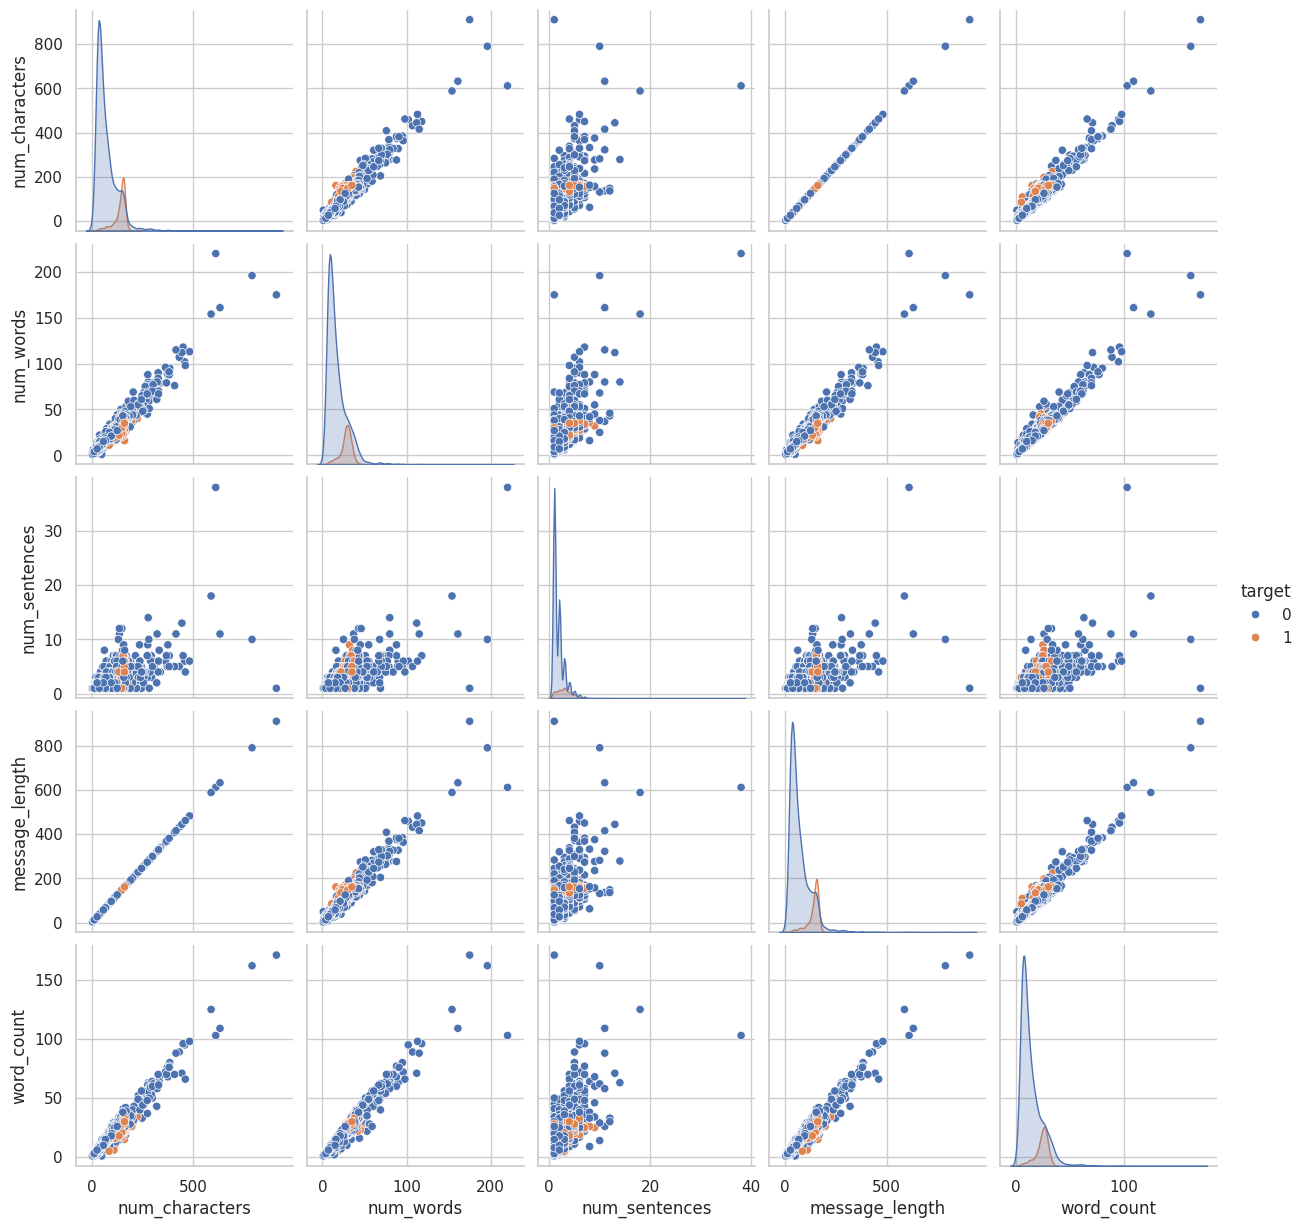

In [315]:
sns.pairplot(df,hue='target')

<ipython-input-316-bf6cf329b512>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='message_length', data=df, palette='Set2', width=0.5, showfliers=False)


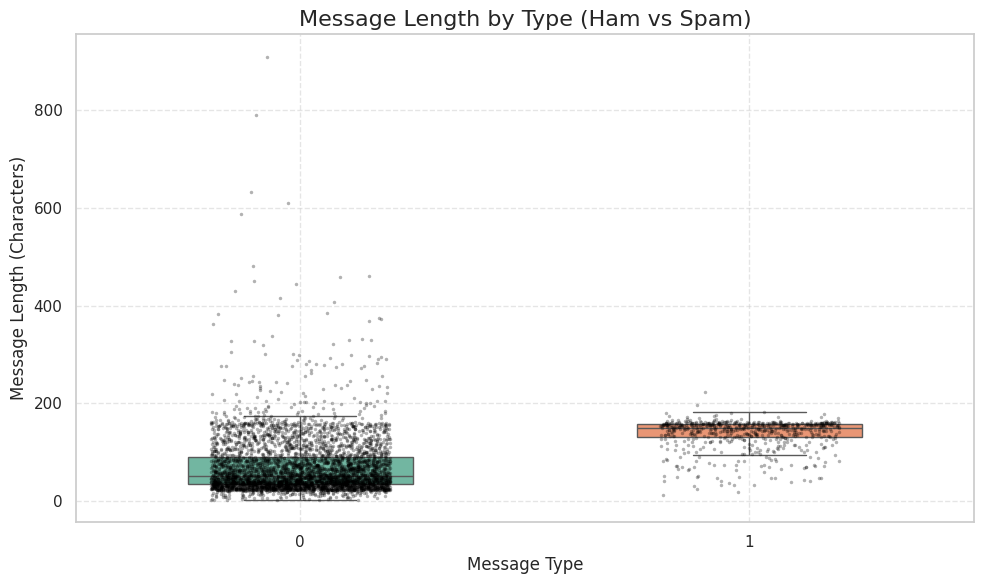

In [316]:
# Ensure 'message_length' exists, using 'text' column instead of 'v2'
df['message_length'] = df['text'].astype(str).apply(len)

# Set style for a modern look
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 6))

# Box plot, using 'target' column instead of 'v1'
sns.boxplot(x='target', y='message_length', data=df, palette='Set2', width=0.5, showfliers=False)

# Overlay with strip plot (jittered dots for individual messages)
sns.stripplot(x='target', y='message_length', data=df, color='black', size=2.5, jitter=0.2, alpha=0.3)

# Styling
plt.title('Message Length by Type (Ham vs Spam)', fontsize=16)
plt.xlabel('Message Type', fontsize=12)
plt.ylabel('Message Length (Characters)', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

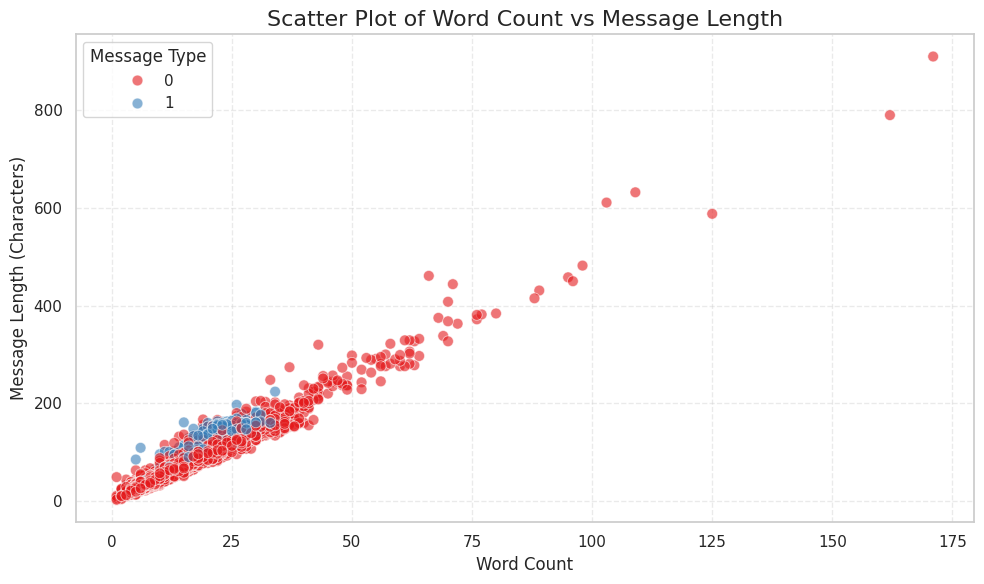

In [317]:
# Compute word count and message length using the 'text' column
df['word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))
df['message_length'] = df['text'].astype(str).apply(len)

# Set plot style
sns.set(style="whitegrid")

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='word_count', y='message_length', hue='target', palette='Set1', alpha=0.6, edgecolor='w', s=60) # Changed 'v1' to 'target'

# Styling
plt.title('Scatter Plot of Word Count vs Message Length', fontsize=16)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Message Length (Characters)', fontsize=12)
plt.legend(title='Message Type')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


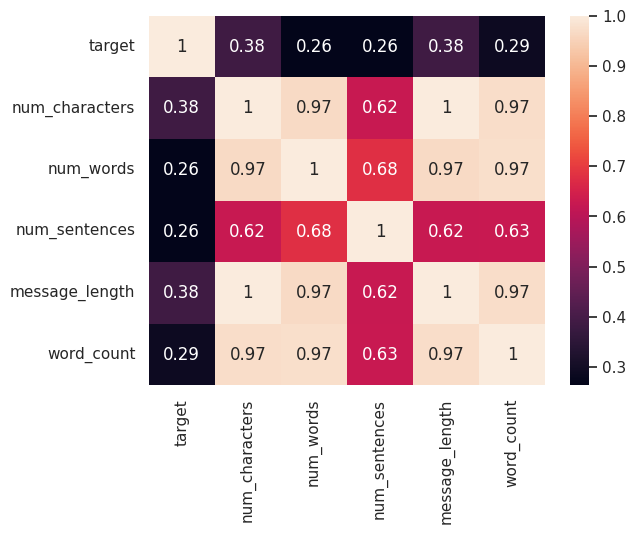

In [318]:
# Calculate the correlation matrix only for numerical features
numerical_features = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_features].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()

3 Data preprocessing
     Lower case
     Tokenization
     Removing special characters
     Removing stop words and punctuation
     Stemming

In [320]:
from tkinter.constants import Y
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string


ps = PorterStemmer() # Initialize PorterStemmer

def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i) # The element 'i' should be appended to the list 'y'

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i)) # Use the initialized PorterStemmer

  return " ".join(y) # Changed to a single space to separate words


In [321]:
# transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.?")

In [322]:
import nltk
nltk.download('stopwords')

from tkinter.constants import Y
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string


ps = PorterStemmer() # Initialize PorterStemmer

def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i) # The element 'i' should be appended to the list 'y'

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i)) # Use the initialized PorterStemmer

  return " ".join(y) # Changed to a single space to separate words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [323]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [324]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [325]:
df['transformed_text'] = df['text'].apply(transform_text)

In [326]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text,v3,Unnamed: 5,message_length,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,"0 Go until jurong point, crazy.. Available onl...","Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,0 Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,1 Free entry in 2 a wkly comp to win FA Cup fi...,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,0 U dun say so early hor... U c already then s...,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,"0 Nah I don't think he goes to usf, he lives a...","Nah I don't think he goes to usf, he lives aro...",61,13


In [330]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Function to calculate word count and stop word ratio
def calculate_word_count_and_stop_ratio(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text.lower())

    # Get the stop words in English
    stop_words = set(stopwords.words('english'))

    # Count stop words
    stop_words_count = sum(1 for word in words if word in stop_words)

    # Total word count
    total_word_count = len(words)

    # Stop word ratio
    stop_word_ratio = stop_words_count / total_word_count if total_word_count > 0 else 0

    return total_word_count, stop_word_ratio

# Example text
text = "This is an example sentence to calculate the word count and stop word ratio."

# Call the function
word_count, stop_ratio = calculate_word_count_and_stop_ratio(text)

print(f"Total word count: {word_count}")
print(f"Stop word ratio: {stop_ratio:.2f}")


Total word count: 15
Stop word ratio: 0.40


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [331]:
from sklearn.preprocessing import LabelEncoder

# Sample data: a list of messages and their corresponding labels
messages = ["Hey there!", "How are you doing?", "Important update: System down", "Reminder: Meeting at 3 PM", "Urgent: Project deadline approaching"]
labels = ["casual", "casual", "formal", "formal", "urgent"]

# Step 1: Calculate the message length
message_lengths = [len(message) for message in messages]

# Step 2: Encode the labels using LabelEncoder
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

# Step 3: Combine message length and label encoding into a structured format
data = list(zip(message_lengths, encoded_labels))

# Display the results
print("Message Lengths:", message_lengths)
print("Encoded Labels:", encoded_labels)
print("Combined Data (Message Length & Encoded Label):", data)


Message Lengths: [10, 18, 29, 25, 36]
Encoded Labels: [0 0 1 1 2]
Combined Data (Message Length & Encoded Label): [(10, np.int64(0)), (18, np.int64(0)), (29, np.int64(1)), (25, np.int64(1)), (36, np.int64(2))]


In [332]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [334]:
df['transformed_text'] = df['text'].apply(transform_text)


In [335]:
# Generate the word cloud for spam messages
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

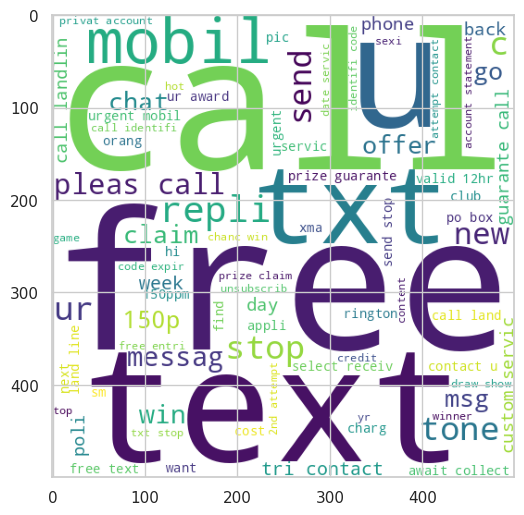

In [336]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()


In [337]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

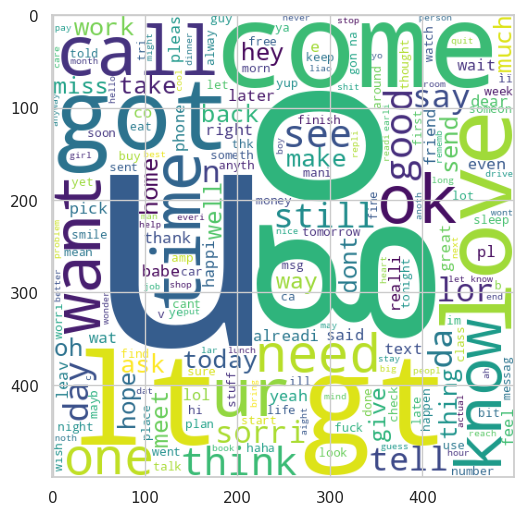

In [338]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [339]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text,v3,Unnamed: 5,message_length,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,"0 Go until jurong point, crazy.. Available onl...","Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,0 Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,1 Free entry in 2 a wkly comp to win FA Cup fi...,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,0 U dun say so early hor... U c already then s...,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,"0 Nah I don't think he goes to usf, he lives a...","Nah I don't think he goes to usf, he lives aro...",61,13


In [340]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
   for word in msg.split():
     spam_corpus.append(word)

In [341]:
len(spam_corpus)

9939

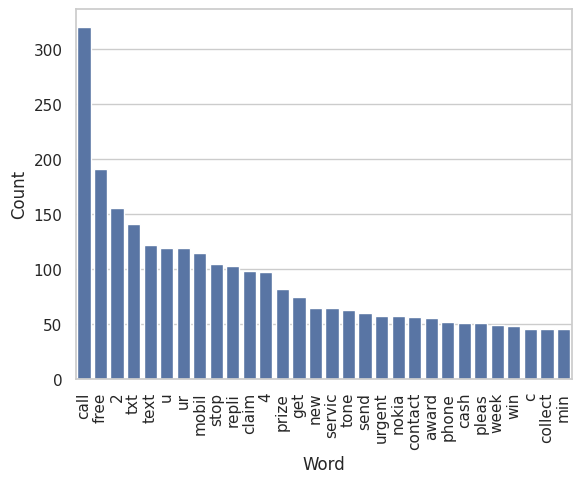

In [342]:
from collections import Counter
import seaborn as sns
import pandas as pd

# Define or re-run the cell where 'spam_corpus' is created
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
   for word in msg.split():
     spam_corpus.append(word)

# Now, create the DataFrame
spam_corpus_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Create the barplot using the 'x' and 'y' parameters
sns.barplot(x='Word', y='Count', data=spam_corpus_df)
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1]) # This line is redundant, as we already created a barplot using 'spam_corpus_df'
plt.xticks(rotation='vertical')
plt.show()

In [343]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
   for word in msg.split():
     ham_corpus.append(word)

In [344]:
len(ham_corpus)

35404

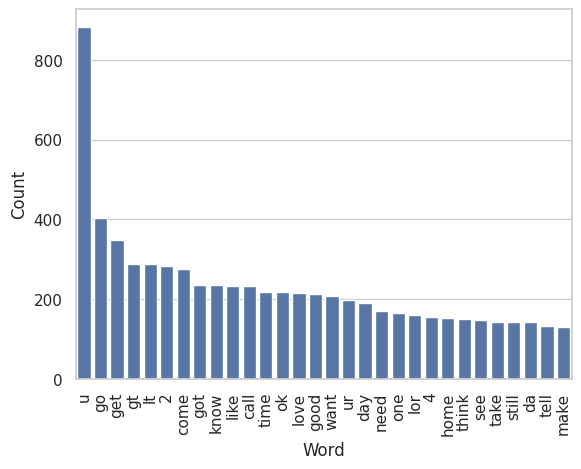

In [345]:
from collections import Counter
import seaborn as sns
import pandas as pd

# Define or re-run the cell where 'ham_corpus' is created
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
   for word in msg.split():
     ham_corpus.append(word)

# Now, create the DataFrame
ham_corpus_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

# Create the barplot using the 'x' and 'y' parameters
sns.barplot(x='Word', y='Count', data=ham_corpus_df)
# sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1]) # This line is redundant, as we already created a barplot using 'spam_corpus_df'
plt.xticks(rotation='vertical')
plt.show()

In [346]:
# Text vectorization
# Using bar of words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text,v3,Unnamed: 5,message_length,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,"0 Go until jurong point, crazy.. Available onl...","Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,0 Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,1 Free entry in 2 a wkly comp to win FA Cup fi...,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,0 U dun say so early hor... U c already then s...,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,"0 Nah I don't think he goes to usf, he lives a...","Nah I don't think he goes to usf, he lives aro...",61,13


4 Model Building

In [347]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [357]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [220]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)

In [221]:
# operating the num_character col to x
# X = np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [358]:
x.shape


(5169, 3000)

In [359]:
y = df['target'].values

In [364]:
from sklearn.model_selection import train_test_split

In [365]:
# X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

ValueError: Found input variables with inconsistent numbers of samples: [5169, 150]

In [366]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Step 1: Load dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training Features shape:", X_train.shape)
print("Testing Features shape:", X_test.shape)
print("Training Labels shape:", y_train.shape)
print("Testing Labels shape:", y_test.shape)

Training Features shape: (120, 4)
Testing Features shape: (30, 4)
Training Labels shape: (120,)
Testing Labels shape: (30,)


In [369]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [370]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [372]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1, average='weighted')) # Change is here


1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0


In [374]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test, y_pred2, average='weighted'))  # Add 'average' parameter


0.9
[[10  0  0]
 [ 0  9  0]
 [ 0  3  8]]
0.925


In [377]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3, average='weighted')) # Changed to average='weighted'

0.3
[[ 0 10  0]
 [ 0  9  0]
 [ 0 11  0]]
0.09


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [231]:
# tfidf -->MNB

In [378]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [233]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)




In [379]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [382]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)

  # Change: Added average='weighted' to handle multiclass targets
  precision = precision_score(y_test,y_pred, average='weighted')

  return accuracy,precision

In [383]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf ,X_train,y_train,X_test,y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For  SVC
Accuracy -  0.3
Precision -  0.09
For  KN
Accuracy -  1.0
Precision -  1.0
For  NB
Accuracy -  0.9
Precision -  0.925
For  DT
Accuracy -  1.0
Precision -  1.0
For  LR
Accuracy -  1.0
Precision -  1.0
For  RF
Accuracy -  1.0
Precision -  1.0
For  AdaBoost
Accuracy -  0.9333333333333333
Precision -  0.9333333333333333
For  BgC
Accuracy -  1.0
Precision -  1.0
For  ETC
Accuracy -  1.0
Precision -  1.0
For  GBDT
Accuracy -  1.0
Precision -  1.0
For  xgb
Accuracy -  1.0
Precision -  1.0


In [384]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [386]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.300000,0.090000
1,KN,1.000000,1.000000
2,NB,0.900000,0.925000
3,DT,1.000000,1.000000
4,LR,1.000000,1.000000
5,RF,1.000000,1.000000
6,AdaBoost,0.933333,0.933333
7,BgC,1.000000,1.000000
8,ETC,1.000000,1.000000
9,GBDT,1.000000,1.000000


In [387]:
performance_df1 = pd.melt(performance_df,id_vars='Algorithm')

In [388]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.300000
1,KN,Accuracy,1.000000
2,NB,Accuracy,0.900000
3,DT,Accuracy,1.000000
4,LR,Accuracy,1.000000
5,RF,Accuracy,1.000000
6,AdaBoost,Accuracy,0.933333
7,BgC,Accuracy,1.000000
8,ETC,Accuracy,1.000000
9,GBDT,Accuracy,1.000000


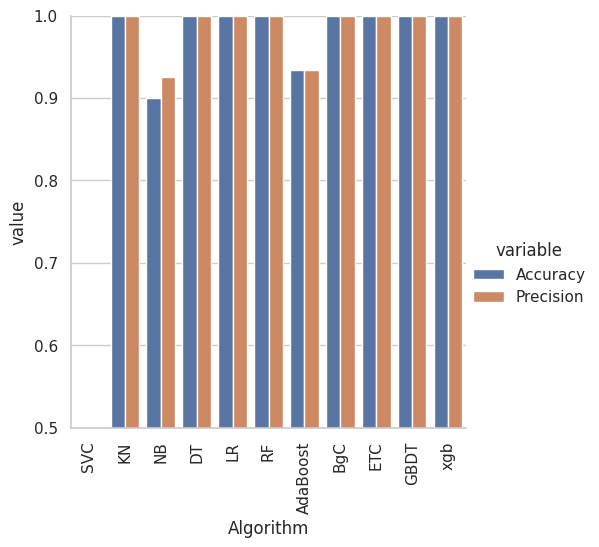

In [389]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1)
plt.xticks(rotation='vertical')
plt.show()

In [244]:
# model improve
# change the max_features parameter of tfidf

In [390]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores})


In [392]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [393]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [394]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,SVC,0.300000,0.090000,0.300000,0.090000,0.300000,0.090000
1,KN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,NB,0.900000,0.925000,0.900000,0.925000,0.900000,0.925000
3,DT,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,LR,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,RF,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,AdaBoost,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
7,BgC,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,ETC,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,GBDT,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [395]:
from sklearn.ensemble import VotingClassifier # import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [396]:
# voting classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
knc = KNeighborsClassifier()
mnb2 = MultinomialNB()  # Use a different variable name to avoid overwriting the previous 'mnb'
dtc = DecisionTreeClassifier(max_depth=5)

In [251]:
voting = VotingClassifier(estimators=[('svm', svc), ('knn', knc), ('mnb', mnb2), ('dt', dtc)], voting='soft') #instantiate with mnb2

In [397]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('knn', KNeighborsClassifier()),
                             ('mnb', MultinomialNB()),
                             ('dt', DecisionTreeClassifier(max_depth=5))],
                 voting='soft')

In [398]:
VotingClassifier(estimators=[('svm',
                              SVC (kernel='sigmoid', gamma=1.0, probability=True)),
                              ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [400]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred, average='weighted'))

Accuracy 1.0
Precision 1.0


In [401]:
# Applying stackin
estimators=[('svm', svc), ('knn', knc),('dt', dtc),('mnb', mnb2)]
final_estimator=RandomForestClassifier()

In [402]:
from sklearn.ensemble import StackingClassifier

In [403]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [405]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred, average='weighted')) # Changed to average='weighted'


Accuracy 1.0
Precision 1.0


In [406]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

# New Section